In [8]:
# import library
import tensorflow as tf 
import numpy      as np
import matplotlib.pyplot as plt
np.random.seed(789); tf.set_random_seed(678); plt.style.use('seaborn')

from sklearn.datasets.samples_generator import make_blobs,make_moons,make_biclusters,make_s_curve
from sklearn import datasets
tf.InteractiveSession()

C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [25]:
def tf_pca_svd(X,mmax=1.0,mmin=0.0): 
    s,U,V  = tf.svd(X,full_matrices=False)
    smin = tf.reduce_min(s,0)
    smax = tf.reduce_max(s,0)
    ScaledS= (mmax-mmin)*((s-smin)/(smax-smin)) + mmin
    recon_data = U @ tf.diag(s) @ tf.transpose(V) * tf.reduce_mean(tf.abs(V) * ScaledS[None,:],0,keepdims =True)
    return recon_data

In [31]:
# declare hyperparameter
number_of_data_points = 4
X,Y   = make_blobs(number_of_data_points,n_features=10)
recon_data = tf_pca_svd(X.T)
recon_data = recon_data.eval()
recon_data = recon_data.T
print(recon_data.shape)

(4, 10)


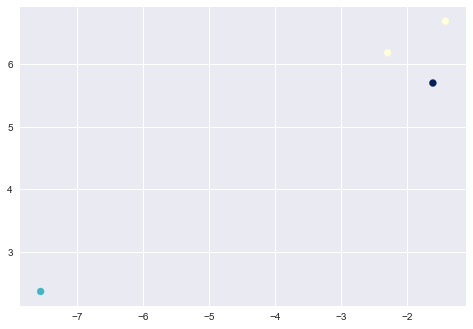

In [32]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap="YlGnBu")
plt.show()

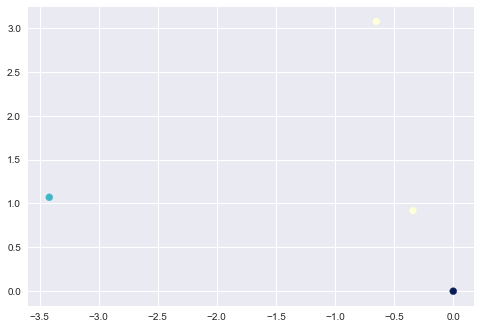

In [34]:
plt.scatter(recon_data[:,0],recon_data[:,1],c=Y,cmap="YlGnBu")
plt.show()

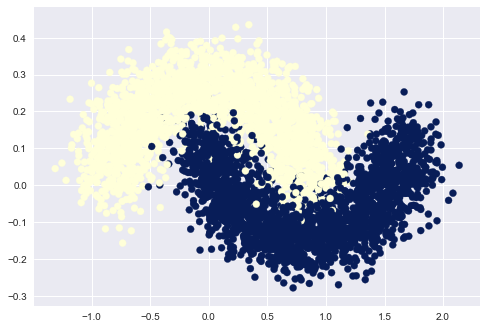

In [44]:
plt.scatter(recon_data2[:,0],recon_data2[:,1],c=Y,cmap="YlGnBu")
plt.show()

In [7]:
# create functions and start session
try: 
    if sess._closed: sess = tf.InteractiveSession()
except:
    sess = tf.InteractiveSession()
def np_pca_svd(X):
    U,s,VT = np.linalg.svd(X,full_matrices=False)
    S      = np.diag(s)
    return U,S,VT.T
    
def tf_pca_svd(X,mmax=1.5,mmin=0.5): 
    s,U,V  = tf.linalg.svd(X,full_matrices=False)
    S      = tf.diag(s)
    s      = s.eval()
    ScaledS= (mmax-mmin)*((s-s.min())/(s.max()-s.min())) + mmin
    return U.eval(),S,V.eval(),ScaledS

def normalize_sign(A,B):
    """
    utility function for resolving the sign ambiguity in SVD
    http://stats.stackexchange.com/q/34396/115202
    """
    signs = np.sign(A) * np.sign(B)
    return A, B * signs    

def plot_data_with_pca(data,vector,value,cenx=0,ceny=0,width=0.05,title=None,save_fig=False,show_fig=True,close=True,alpha=1.0):
    plt.scatter(data[:,0],data[:,1],c=label,cmap='YlOrBr',alpha=alpha)
    ax1 = plt.arrow(cenx,ceny,*vector[:,0]*value[0],width=width,length_includes_head=False,color='Red' ,capstyle='projecting',label='PC 1',alpha=alpha)
    ax2 = plt.arrow(cenx,ceny,*vector[:,1]*value[1],width=width,length_includes_head=False,color='Blue',capstyle='projecting',label='PC 2',alpha=alpha)
    if title: plt.title(title,fontsize=30)
    plt.legend([ax1,ax2],['pc 1','pc 2'],prop={'size': 20}); plt.tight_layout()
    if save_fig: plt.savefig('figure/'+str(title)+'.png')
    if show_fig: plt.show()
    if close   : plt.close('all')
    
def normalize_with_range(data,mmax=1.,mmin=0.0):
    norm_data = (mmax-mmin) * ((data - data.min(0,keepdims=True))/ (data.max(0,keepdims=True)-data.min(0,keepdims=True))) + mmin
    return norm_data

number_of_data = 4000
skew_matrix    = np.array([[2,0.2],[1.1,0]])
# create some simple dataset blobs and skew it (center it as well)
data,label = datasets.make_blobs(n_samples=number_of_data,centers=2,random_state=23,cluster_std =1.9,center_box =(-20,20))
data       = data @ skew_matrix
data       = data - data.mean(0,keepdims=True)

=============================== FIND PC ============================
Are the two projection vector same? :  True
=============================== FIND PC ============================
=============================== PROJECTION ============================
Are the two PROJECTED DATA same?   :  True
Are the two PROJECTED VECTOR same? :    True
=============================== PROJECTION ============================
================================= RECONSTRUCTION ==========================
Are the two RECONSTRUCTED DATA same?   :  True
Are the two RECONSTRUCTED VECTOR same? :  True
================================= RECONSTRUCTION ==========================
Are the ORIGINAL and RECONSTRUCTED DATA same?   :  True
Are the ORIGINAL and RECONSTRUCTED DATA same?   :  True
Are the ORIGINAL and RECONSTRUCTED VECTOR same? :  True
Are the ORIGINAL and RECONSTRUCTED VECTOR same? :  True


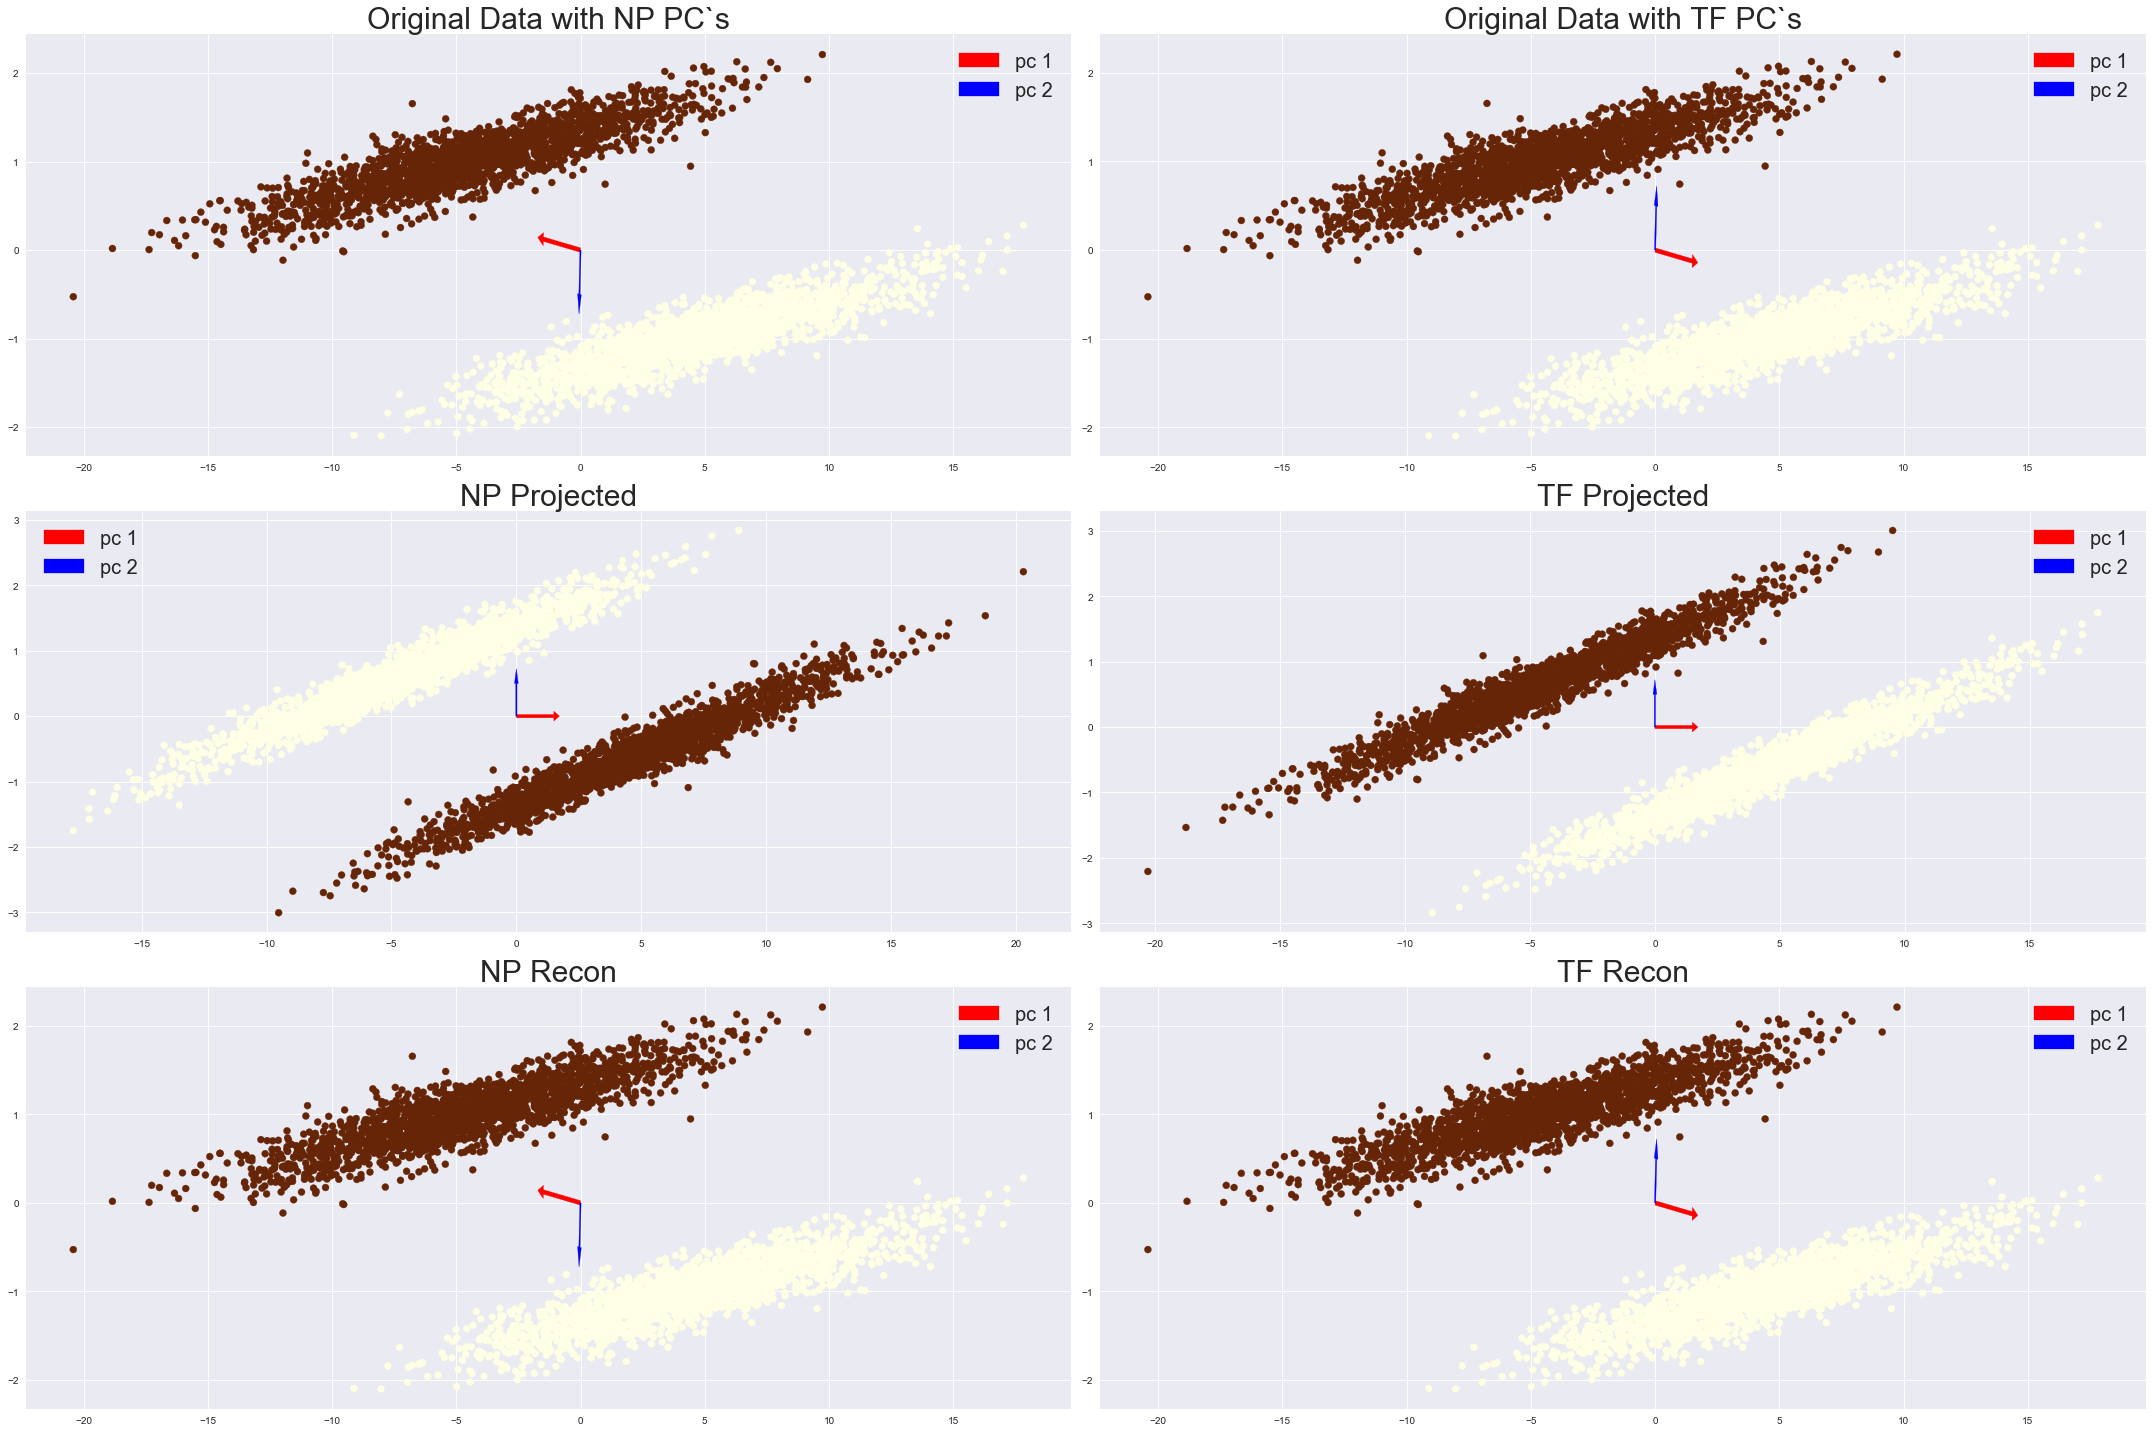

In [8]:
# create some simple dataset blobs and skew it (center it as well)
data,label = datasets.make_blobs(n_samples=number_of_data,centers=2,random_state=23,cluster_std =1.9,center_box =(-20,20))
data       = data @ skew_matrix
data       = data - data.mean(0,keepdims=True)

# ==================================== FIND PC =====================================================
cov     = data.T @ data / (data.shape[0] - 1)
val,vec = np.linalg.eigh(cov)
vec     = vec.T
vec     = vec[:,::-1]; val     = val[::-1]

og_U,og_S,og_V,og_ss = tf_pca_svd(data)

print('=============================== FIND PC ============================')
print('Are the two projection vector same? : ',np.allclose(*normalize_sign(vec,og_V)))
print('=============================== FIND PC ============================')
# ==================================== FIND PC =====================================================

# =================================== PROJECTION ======================================================
np_projected_data = data   @ vec
np_projected_veco = vec.T  @ vec

tf_projected_data = (og_U  @ og_S).eval()
tf_projected_veco = og_V.T @ og_V
print('=============================== PROJECTION ============================')
print('Are the two PROJECTED DATA same?   : '  ,np.allclose(*normalize_sign(np_projected_data,tf_projected_data)))
print('Are the two PROJECTED VECTOR same? :   ',np.allclose(*normalize_sign(np_projected_veco,tf_projected_veco)))
print('=============================== PROJECTION ============================')
# =================================== PROJECTION ======================================================

# =================================== RECONSTRUCTION ======================================================
np_reconstructed_data = np_projected_data @ vec.T
np_reconstructed_veco = np_projected_veco @ vec

tf_reconstructed_data = tf_projected_data @ og_V.T
tf_reconstructed_veco = tf_projected_veco @ og_V
print('================================= RECONSTRUCTION ==========================')
print('Are the two RECONSTRUCTED DATA same?   : ',np.allclose(*normalize_sign(np_reconstructed_data,tf_reconstructed_data)))
print('Are the two RECONSTRUCTED VECTOR same? : ',np.allclose(*normalize_sign(np_reconstructed_veco,tf_reconstructed_veco)))
print('================================= RECONSTRUCTION ==========================')

print('===========================================================')
print('Are the ORIGINAL and RECONSTRUCTED DATA same?   : ',np.allclose(*normalize_sign(np_reconstructed_data,data)))
print('Are the ORIGINAL and RECONSTRUCTED DATA same?   : ',np.allclose(*normalize_sign(tf_reconstructed_data,data)))
print('Are the ORIGINAL and RECONSTRUCTED VECTOR same? : ',np.allclose(*normalize_sign(np_reconstructed_veco,vec)))
print('Are the ORIGINAL and RECONSTRUCTED VECTOR same? : ',np.allclose(*normalize_sign(tf_reconstructed_veco,og_V)))
print('===========================================================')
# =================================== RECONSTRUCTION ======================================================

plt.figure(figsize=(30,20))
plt.subplot(321); plot_data_with_pca(data,vec ,og_ss,title='Original Data with NP PC`s',show_fig=False,close=False)
plt.subplot(322); plot_data_with_pca(data,og_V,og_ss,title='Original Data with TF PC`s',show_fig=False,close=False)
plt.subplot(323); plot_data_with_pca(np_projected_data,np_projected_veco,og_ss,title='NP Projected',show_fig=False,close=False)
plt.subplot(324); plot_data_with_pca(tf_projected_data,tf_projected_veco,og_ss,title='TF Projected',show_fig=False,close=False)
plt.subplot(325); plot_data_with_pca(np_reconstructed_data,np_reconstructed_veco,og_ss,title='NP Recon',show_fig=False,close=False)
plt.subplot(326); plot_data_with_pca(tf_reconstructed_data,tf_reconstructed_veco,og_ss,title='TF Recon',show_fig=False,close=False)
plt.show()

=============================== FIND PC ============================
Are the two projection vector same? :  True
=============================== FIND PC ============================
=============================== PROJECTION ============================
Are the two PROJECTED DATA same?   :  True
Are the two PROJECTED VECTOR same? :    True
=============================== PROJECTION ============================
================================= RECONSTRUCTION ==========================
Are the two RECONSTRUCTED DATA same?   :  True
Are the two RECONSTRUCTED VECTOR same? :  True
================================= RECONSTRUCTION ==========================
Are the ORIGINAL and RECONSTRUCTED DATA same?   :  False
Are the ORIGINAL and RECONSTRUCTED DATA same?   :  False
Are the ORIGINAL and RECONSTRUCTED VECTOR same? :  True
Are the ORIGINAL and RECONSTRUCTED VECTOR same? :  True


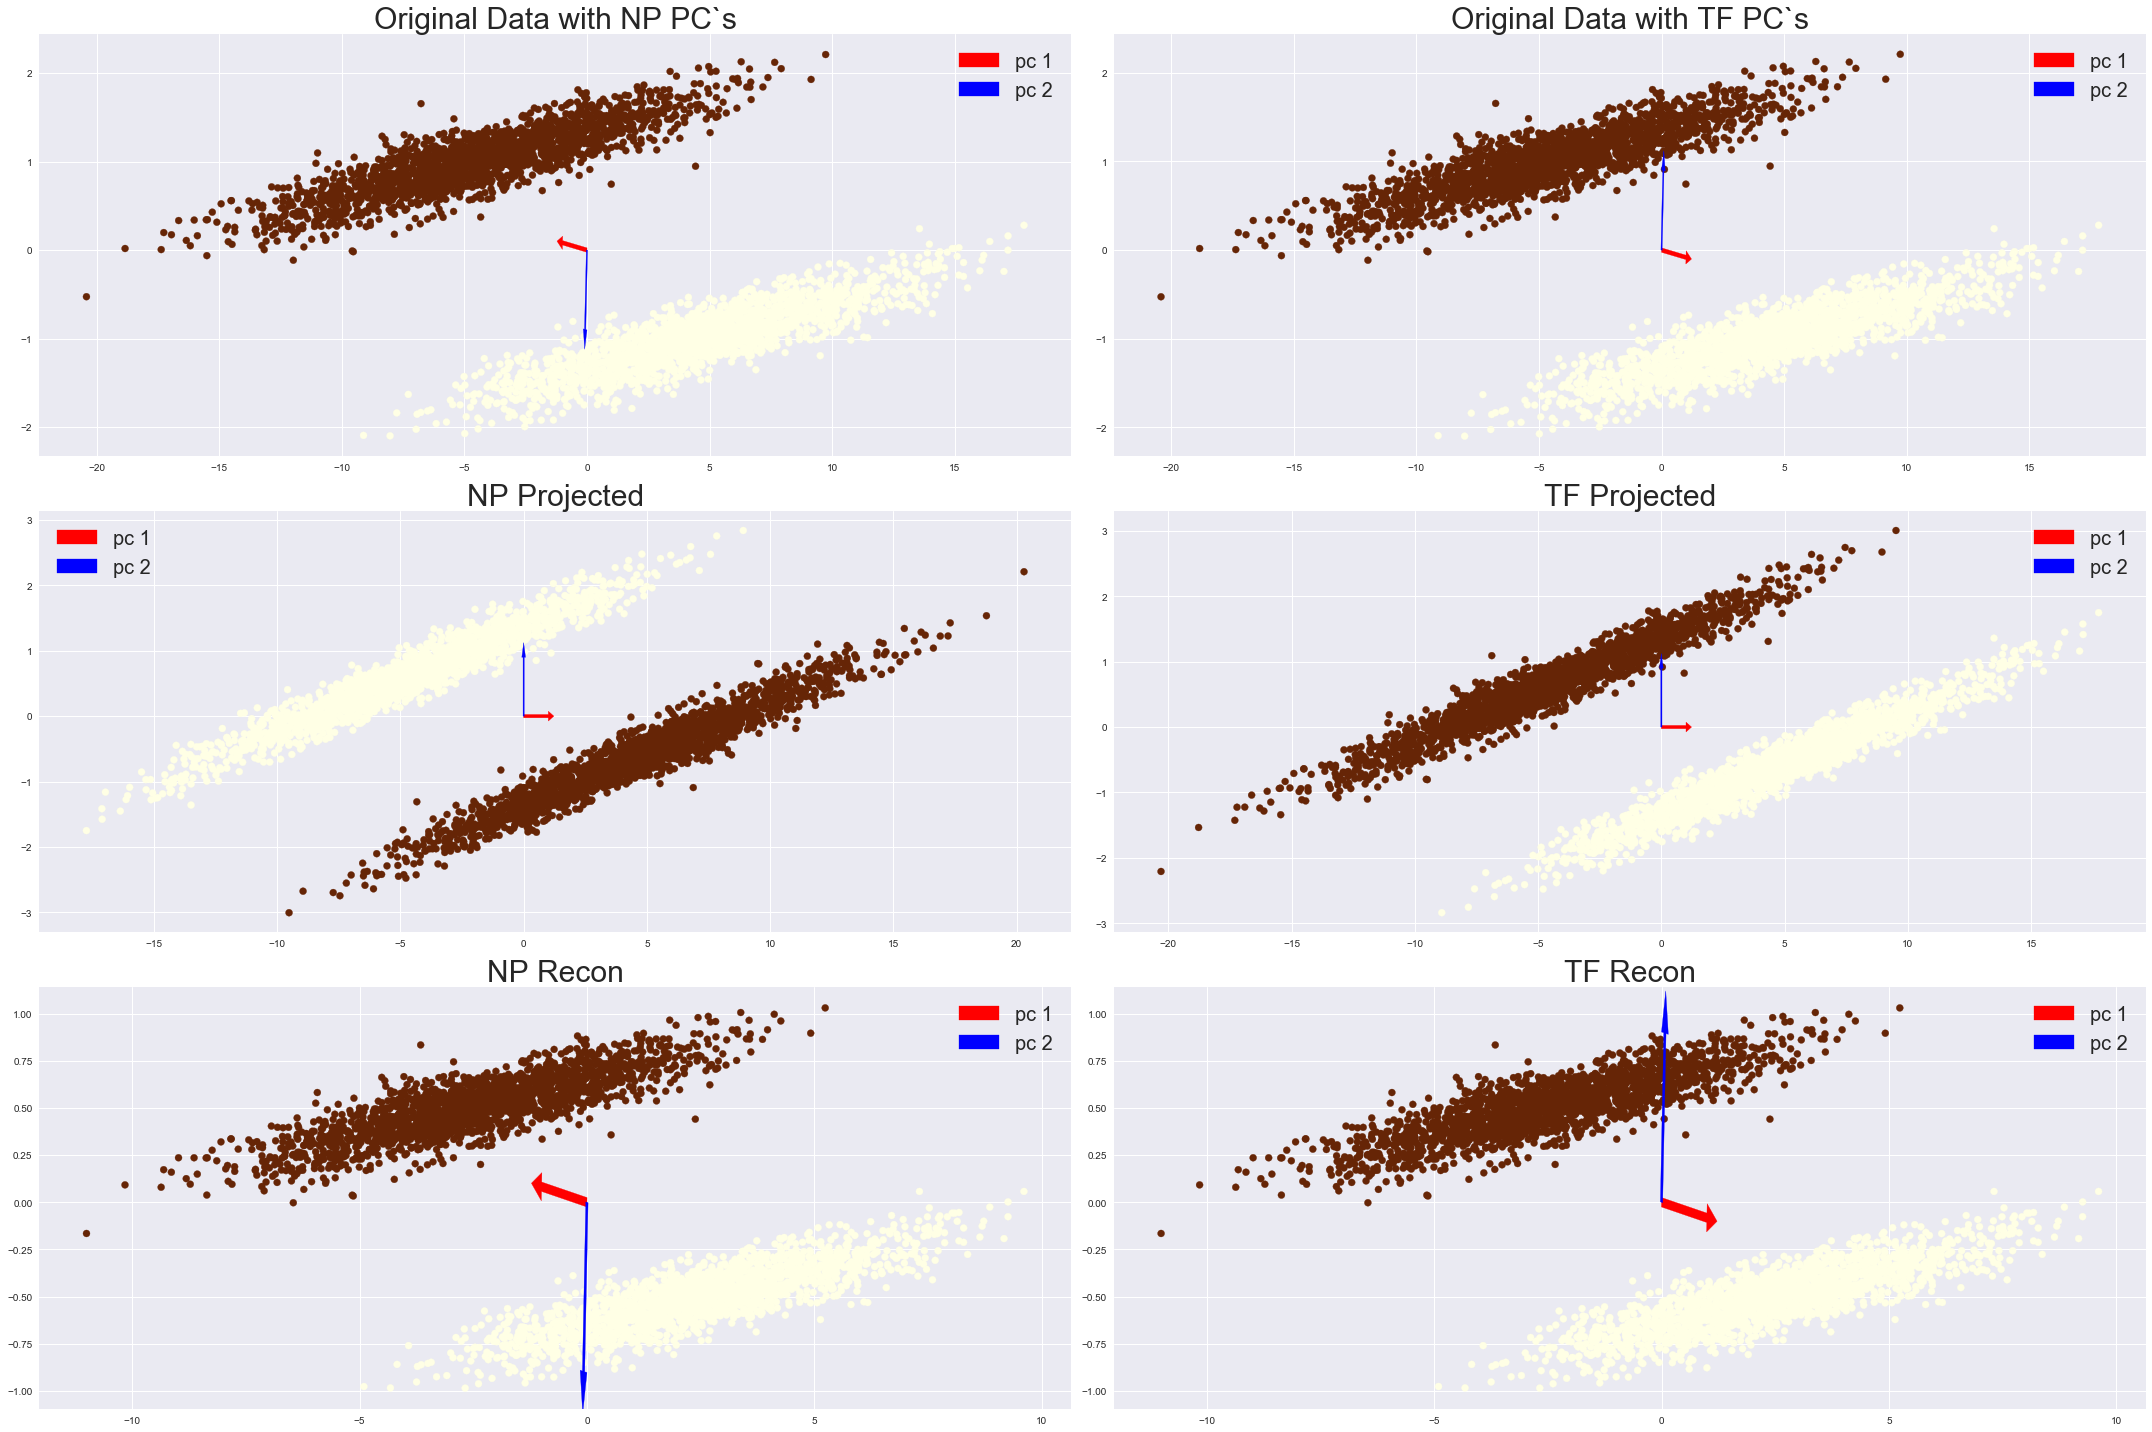

In [9]:
# now in the reconstructed section play 
# ==================================== FIND PC =====================================================
cov     = data.T @ data / (data.shape[0] - 1)
val,vec = np.linalg.eigh(cov)
vec     = vec.T
vec     = vec[:,::-1]; val     = val[::-1]

og_U,og_S,og_V,og_ss = tf_pca_svd(data,mmax=1.0,mmin=0.9)

print('=============================== FIND PC ============================')
print('Are the two projection vector same? : ',np.allclose(*normalize_sign(vec,og_V)))
print('=============================== FIND PC ============================')
# ==================================== FIND PC =====================================================

# =================================== PROJECTION ======================================================
np_projected_data = data   @ vec
np_projected_veco = vec.T  @ vec

tf_projected_data = (og_U  @ og_S).eval()
tf_projected_veco = og_V.T @ og_V
print('=============================== PROJECTION ============================')
print('Are the two PROJECTED DATA same?   : '  ,np.allclose(*normalize_sign(np_projected_data,tf_projected_data)))
print('Are the two PROJECTED VECTOR same? :   ',np.allclose(*normalize_sign(np_projected_veco,tf_projected_veco)))
print('=============================== PROJECTION ============================')
# =================================== PROJECTION ======================================================

# ======== modify the reconstruction vector
np_vec_m =  vec   * (np.abs(vec)  * og_ss[None,:]).mean(0,keepdims=True)
tf_vec_m =  og_V  * (np.abs(og_V) * og_ss[None,:]).mean(0,keepdims=True)
# ======== modify the reconstruction vector

# =================================== RECONSTRUCTION ======================================================
np_reconstructed_data = np_projected_data @ np_vec_m.T
np_reconstructed_veco = np_projected_veco @ vec

tf_reconstructed_data = tf_projected_data @ tf_vec_m.T
tf_reconstructed_veco = tf_projected_veco @ og_V
print('================================= RECONSTRUCTION ==========================')
print('Are the two RECONSTRUCTED DATA same?   : ',np.allclose(*normalize_sign(np_reconstructed_data,tf_reconstructed_data)))
print('Are the two RECONSTRUCTED VECTOR same? : ',np.allclose(*normalize_sign(tf_reconstructed_veco,tf_reconstructed_veco)))
print('================================= RECONSTRUCTION ==========================')

print('===========================================================')
print('Are the ORIGINAL and RECONSTRUCTED DATA same?   : ',np.allclose(*normalize_sign(np_reconstructed_data,data)))
print('Are the ORIGINAL and RECONSTRUCTED DATA same?   : ',np.allclose(*normalize_sign(tf_reconstructed_data,data)))
print('Are the ORIGINAL and RECONSTRUCTED VECTOR same? : ',np.allclose(*normalize_sign(np_reconstructed_veco,vec)))
print('Are the ORIGINAL and RECONSTRUCTED VECTOR same? : ',np.allclose(*normalize_sign(tf_reconstructed_veco,og_V)))
print('===========================================================')
# =================================== RECONSTRUCTION ======================================================

plt.figure(figsize=(30,20))
plt.subplot(321); plot_data_with_pca(data,vec ,og_ss,title='Original Data with NP PC`s',show_fig=False,close=False)
plt.subplot(322); plot_data_with_pca(data,og_V,og_ss,title='Original Data with TF PC`s',show_fig=False,close=False)
plt.subplot(323); plot_data_with_pca(np_projected_data,np_projected_veco,og_ss,title='NP Projected',show_fig=False,close=False)
plt.subplot(324); plot_data_with_pca(tf_projected_data,tf_projected_veco,og_ss,title='TF Projected',show_fig=False,close=False)
plt.subplot(325); plot_data_with_pca(np_reconstructed_data,np_reconstructed_veco,og_ss,title='NP Recon',show_fig=False,close=False)
plt.subplot(326); plot_data_with_pca(tf_reconstructed_data,tf_reconstructed_veco,og_ss,title='TF Recon',show_fig=False,close=False)
plt.show()

# Reference 
1. Brownlee, J. (2018). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved 9 December 2018, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
2. sklearn.datasets.make_s_curve — scikit-learn 0.20.1 documentation. (2018). Scikit-learn.org. Retrieved 9 December 2018, from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html#sklearn.datasets.make_s_curve
3. Eager execution basics | TensorFlow. (2018). TensorFlow. Retrieved 9 December 2018, from https://www.tensorflow.org/tutorials/eager/eager_basics
4. matplotlib, S. (2018). Seaborn configuration hides default matplotlib. Stack Overflow. Retrieved 9 December 2018, from https://stackoverflow.com/questions/33099348/seaborn-configuration-hides-default-matplotlib
5. 